<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/1_Embedded_Method_SelectFromModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [2]:
X = [[ 0.87, -1.34,  0.31 ],
      [-2.79, -0.02, -0.85 ],
      [-1.34, -0.48, -2.55 ],
      [ 1.92,  1.48,  0.65 ]]

y = [0, 1, 0, 1]

In [3]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)

In [4]:
selector.estimator_.coef_

array([[-0.3252302 ,  0.83462377,  0.49750423]])

In [5]:
selector.threshold_

0.5524527319086915

In [6]:
selector.get_support()

array([False,  True, False])

In [7]:
selector.transform(X)

array([[-1.34],
       [-0.02],
       [-0.48],
       [ 1.48]])

-----------

- **Embedded Method using random forest ---> CloudyML**

------------------

#### **1) Feature Selection Using Random forest**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassfier
from sklearn.feature_selection import SelectFromModel

2. In all feature selection procedures, it is a good practice to select the features by examining only the training set. This is to avoid overfitting.

- So considering we have a train and a test dataset. We select the features from the train set and then transfer the changes to the test set later.

In [ ]:
X_train,y_train,X_test,y_test = train_test_split(data,test_size=0.3)

3. Here I will do the model fitting and feature selection altogether in one line of code.

- Firstly, I specify the random forest instance, indicating the number of trees.

- Then I use selectFromModel object from sklearn to automatically select the features.

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.

4. To see which features are important we can use get_support method on the fitted model.

In [ ]:
sel.get_support()

- It will return an array of boolean values. True for the features whose importance is greater than the mean importance and False for the rest.

5. We can now make a list and count the selected features.

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

It will return an Integer representing the number of features selected by the random forest.

6. To get the name of the features selected

In [ ]:
print(selected_feat)

It will return the name of the selected features.

7. We can also check and plot the distribution of importance.

In [ ]:
pd.series(sel.estimator_,feature_importances_,.ravel()).hist()

-------------------

#### **2) Lasso: SelectFromModel**

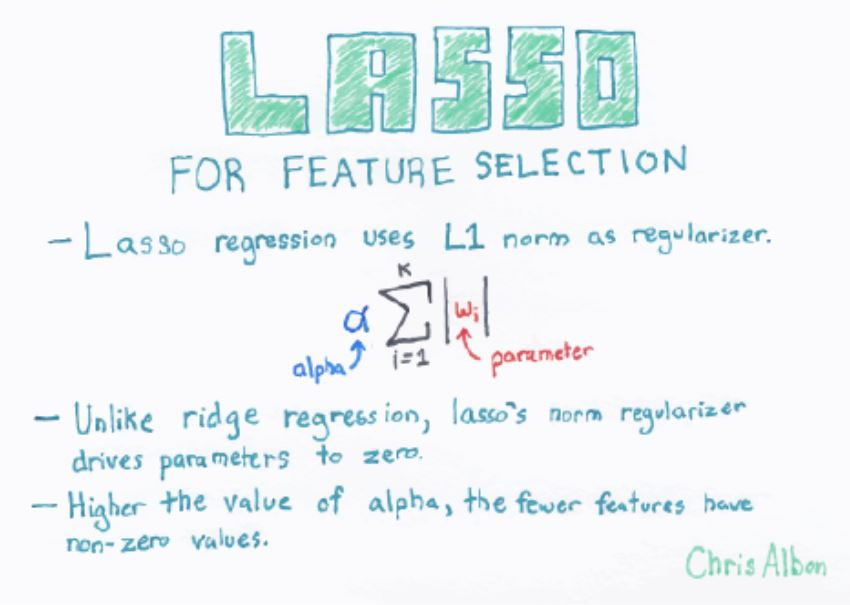

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

#### **3) Tree-based: SelectFromModel**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

-------------

In [ ]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

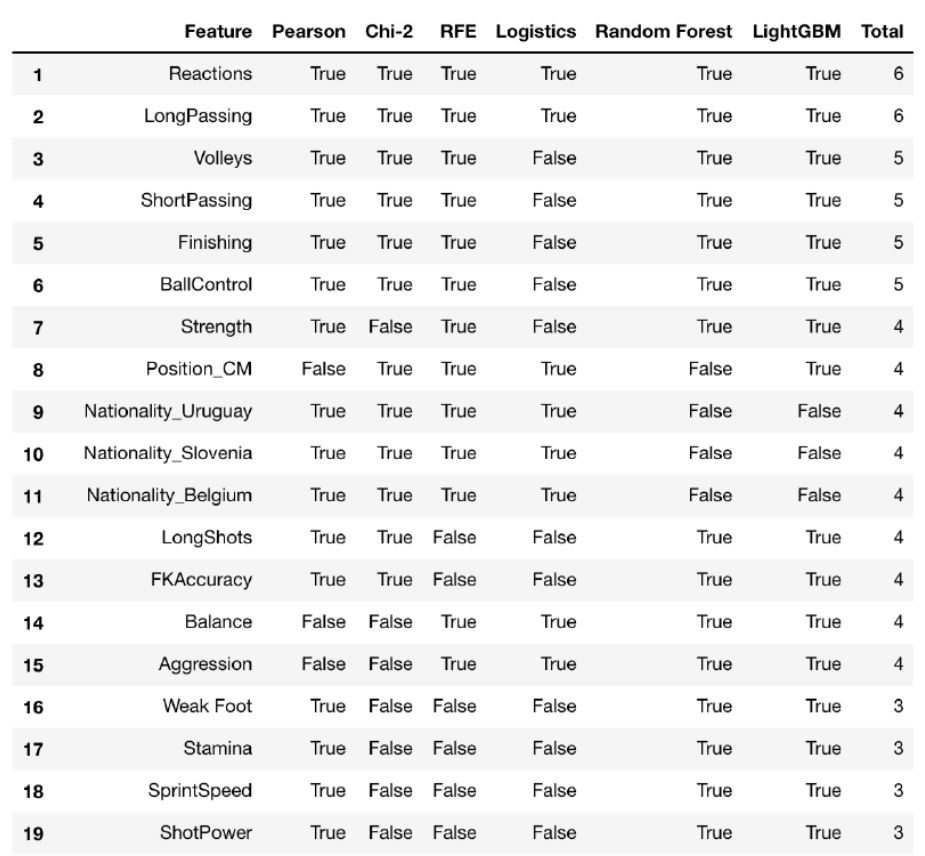

------------